<a href="https://colab.research.google.com/github/inessanew/sehenovuniversary/blob/main/Homework_mod5_1_InnaS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [7]:
from google.colab import data_table
import vega_datasets

In [8]:
data_table.enable_dataframe_formatter()

In [69]:
import pandas as pd
import numpy as np
np.random.seed(0)
accessories = np.random.choice(['Мышь', 'Клавиатура', 'Наушники'], size=30, replace=True)
model = np.random.choice (['Game', 'User', 'Childlike'], size=30)
transmission = ['Проводной', 'Беспроводной'] * 15
thickness = np.round(np.random.uniform(1, 4, 30), 2)
price = np.round(np.random.uniform(1, 10, 30), 2)
classif = np.random.randint(1,5,size=30)

start_date = pd.to_datetime('2020-01-11')
end_date = pd.to_datetime('2025-01-11')
date_range = pd.date_range(start=start_date, end=end_date)
priv = np.random.choice(date_range, size=30, replace=False)


data = {
    'accessories' : accessories,
    'classif' : classif,
    'thickness' : thickness,
    'model' : model,
    'price' : price,
    'transmission' : transmission,
    'priv' : priv
}
df = pd.DataFrame(data)
display(df)

,accessories,classif,thickness,model,price,transmission,priv
0,Мышь,1,3.91,User,5.06,Проводной,2023-03-01
1,Клавиатура,1,2.96,Childlike,1.18,Беспроводной,2021-01-31
2,Мышь,1,1.51,Game,4.98,Проводной,2024-01-02
3,Клавиатура,4,2.07,User,9.82,Беспроводной,2022-01-01
4,Клавиатура,4,3.25,User,4.24,Проводной,2024-01-27
5,Наушники,1,2.82,User,5.33,Беспроводной,2023-04-13
6,Мышь,3,1.98,Game,7.20,Проводной,2021-11-25
7,Наушники,3,1.12,Childlike,8.92,Беспроводной,2022-09-19
8,Мышь,1,2.90,Game,9.26,Проводной,2021-11-29
9,Мышь,1,3.88,Childlike,2.95,Беспроводной,2021-06-16


Гипотеза: классификация не зависит от модели и цены

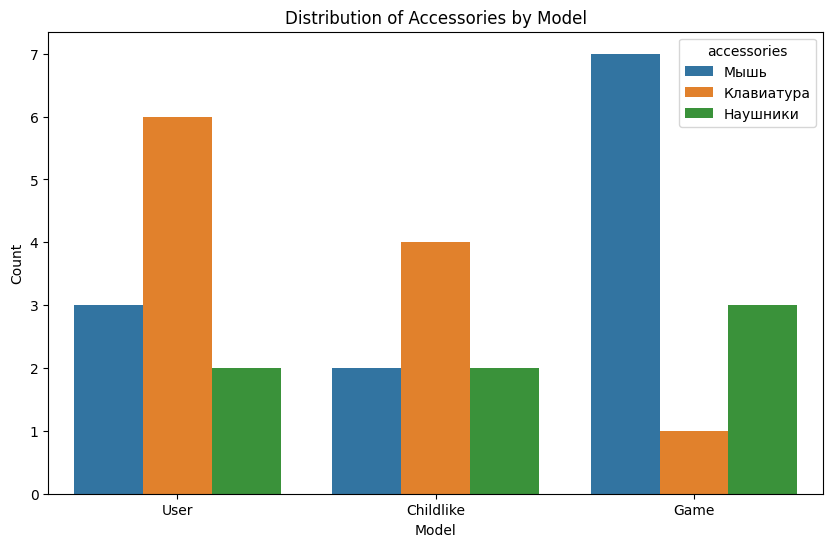

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='model', hue='accessories')
plt.title('Distribution of Accessories by Model')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

Анализ данных показывает, что в категории игровых аксессуаров преобладает компьютерная мышь, в категории пользовательских и детских аксессуаров чаще встречается клавиатура компьютера.

ANOVA results for price and classif:
                sum_sq    df         F    PR(>F)
C(classif)   43.532592   3.0  2.327365  0.097923
Residual    162.107145  26.0       NaN       NaN

Interpretation:
Based on ANOVA, there is no statistically significant relationship between 'price' and 'classif'.


/tmp/ipython-input-3497250068.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table_price['PR(>F)'][0] < alpha:


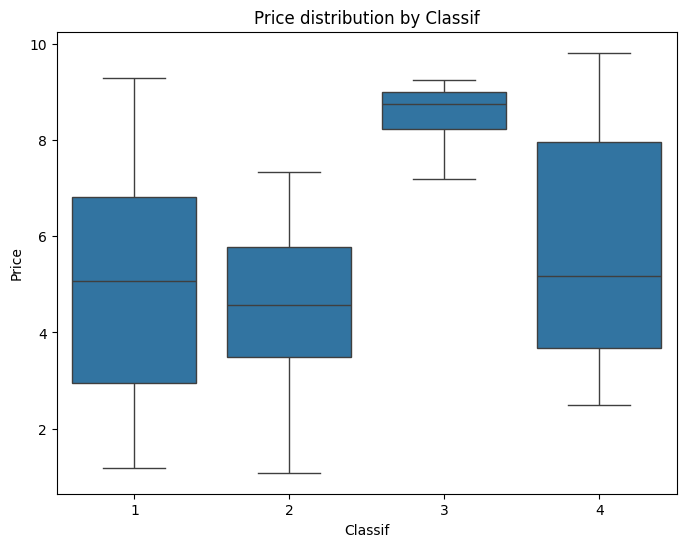

In [71]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Test the hypothesis that 'price' does not depend on 'classif' using ANOVA
# Ensure 'classif' is treated as a categorical variable for ANOVA
df['classif'] = df['classif'].astype('category')

model_anova_price = ols('price ~ C(classif)', data=df).fit()
anova_table_price = sm.stats.anova_lm(model_anova_price, typ=2)
print("ANOVA results for price and classif:")
print(anova_table_price)

# Interpretation
alpha = 0.05

print("\nInterpretation:")
if anova_table_price['PR(>F)'][0] < alpha:
    print("Based on ANOVA, there is a statistically significant relationship between 'price' and 'classif'.")
else:
    print("Based on ANOVA, there is no statistically significant relationship between 'price' and 'classif'.")

# Visualize the relationship using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='classif', y='price', data=df)
plt.title('Price distribution by Classif')
plt.xlabel('Classif')
plt.ylabel('Price')
plt.show()

 Согласно дисперсионному анализу, статистически значимой связи между «ценой» и «классом» нет.